### Logistic Regression
This file contains the code for a Logistic Regression ML algorithm implemented in Pytorch. The goal of this algorithm is to take input data and classify it in one of two categories. Often, this is used for yes/no type questions. Once trained on existing data, logistic regression can be used to classify new pieces of data instantly.

In [1]:
# Imports
import torch
import torch.nn as nn

import numpy as np
import random
import time

import matplotlib.pyplot as plt

from datasets import load_dataset

In [2]:
# Setting torch to use GPU acceleration if possible.
device = torch.device("cpu")

if torch.cuda.is_available():
    device = torch.device("cuda")

torch.set_default_device(device)
print(f"Using device: {torch.get_default_device()}")

Using device: cpu


In [3]:
# ====================== DATA COLLECTION ======================

In [4]:
# Generate dummy data using numpy. The data here is guaranteed to have some correlation.
DATA_COUNT = 1000
X_SCALE = 5
BOUNDARY = 3

X = np.random.rand(DATA_COUNT, 1) * X_SCALE
Y = (X > BOUNDARY).astype(int)

In [5]:
# Create the train and test splits.
TRAIN_SPLIT = 0.8

splitIndex = int(DATA_COUNT * TRAIN_SPLIT)

trainX = X[:splitIndex]
trainY = Y[:splitIndex]

testX = X[splitIndex:]
testY = Y[splitIndex:]

In [6]:
# ====================== MODEL CONSTRUCTION ======================

In [7]:
class LogisticRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        y = self.linear(x)
        return torch.sigmoid(y)

In [9]:
# Train an agent.
LEARNING_RATE = 1e-3
EPOCHS = 10000
BATCH_SIZE = 64
REPORT_INTERVAL = 100

agent = LogisticRegressionModel()

allLosses = []
agent.train()

lossFN = nn.BCELoss()
optimizer = torch.optim.Adam(agent.parameters(), lr = LEARNING_RATE)

for epoch in range(1, EPOCHS + 1):
    currentLoss = 0
    
    agent.zero_grad() # Reset Gradients.

    # Create batches.
    batches = list(range(len(trainX)))
    random.shuffle(batches)
    batches = np.array_split(batches, len(batches) // BATCH_SIZE)

    # Run through the batches.
    for i, batch in enumerate(batches):
        batchLoss = 0

        for index in batch:
            x = trainX[index]
            y = trainY[index]

            output = agent(torch.from_numpy(x).float())
            loss = lossFN(output, torch.from_numpy(y).float())
            batchLoss += loss

        # Batch complete. Optimise parameters.
        batchLoss.backward()
        nn.utils.clip_grad_norm_(agent.parameters(), 3)
        optimizer.step()
        optimizer.zero_grad()
        currentLoss += batchLoss.item() / len(batch)

    allLosses.append(currentLoss)

    if epoch % REPORT_INTERVAL == 0:
        print(f"Epoch #{epoch}: Average batch loss - {allLosses[-1]}")

Epoch #100: Average batch loss - 4.972476598635242
Epoch #200: Average batch loss - 3.704552643981685
Epoch #300: Average batch loss - 2.949527488580822
Epoch #400: Average batch loss - 2.4582931435739006
Epoch #500: Average batch loss - 2.1250369338523423
Epoch #600: Average batch loss - 1.8748031309534121
Epoch #700: Average batch loss - 1.6838724635834608
Epoch #800: Average batch loss - 1.5328463787732756
Epoch #900: Average batch loss - 1.4108601259139262
Epoch #1000: Average batch loss - 1.3106711700134068
Epoch #1100: Average batch loss - 1.2264550890333779
Epoch #1200: Average batch loss - 1.1582911837322039
Epoch #1300: Average batch loss - 1.0992227699464396
Epoch #1400: Average batch loss - 1.0475592942110612
Epoch #1500: Average batch loss - 1.0036566493630894
Epoch #1600: Average batch loss - 0.9643037145572353
Epoch #1700: Average batch loss - 0.9291615940121599
Epoch #1800: Average batch loss - 0.8978085685024322
Epoch #1900: Average batch loss - 0.8700416983656621
Epoch

In [10]:
# ====================== Model Evaluation ======================

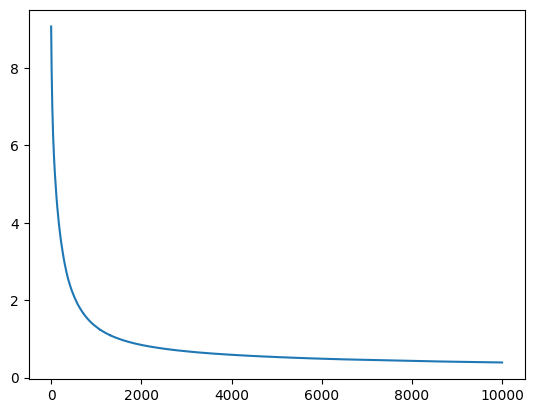

In [12]:
# Plotting the loss of the model.
plt.figure()
plt.plot(allLosses)
plt.show()

In [11]:
# Testing the model.
totalLoss = 0.0

for idx in range(len(testX)):
    x = testX[idx]
    y = testY[idx]

    output = agent(torch.from_numpy(x).float())
    totalLoss += abs((output - torch.from_numpy(y).float()).item())

averageLoss = totalLoss / len(testX)
print(f"Average Loss: {averageLoss}")

Average Loss: 0.028604476230925595
